Type percentage of training set (between 0 and 100): 70

------------------DATASET SEPARATION: -------------------
Class:  Setosa ----qtd train:  35 ----qtd test:  15
Class:  Versicolor ----qtd train:  35 ----qtd test:  15
Class:  Virginica ----qtd train:  35 ----qtd test:  15


Teste para K igual a 5:
-----------CONFUSION MATRIX FOR K= 5-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
---------------------NORMALIZED CONFUSION MATRIX-----------------------


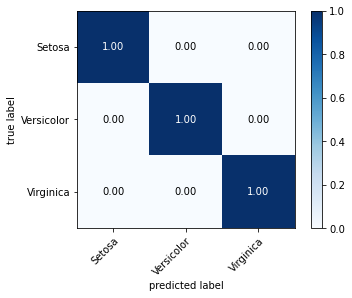

Bytes used in this module:  144744448
Test execution: --- 1.3625762462615967 seconds ---
Iterating thourh range of K's
Type range of k you want to iterate
Type inferior k: 1
Type superior k: 10
-----------CONFUSION MATRIX FOR K= 1-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Accuracy:  0.9333333333333333
-----------CONFUSION MATRIX FOR K= 2-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 3-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 4-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 5-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 6-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 7-------------
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]
Accuracy:  1.0
-----------CONFUSION MATRIX FOR K= 8-------------
[[15  0  0]
 [ 0 15  0]
 [ 

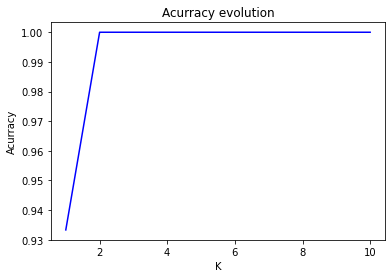

In [2]:
import math
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

def separate_train_test(variables,classes): #separate classes between train and test
    unique_classes= np.unique(classes)
    train_variables=np.zeros([0,variables.shape[1]])
    test_variables=np.zeros([0,variables.shape[1]])
    train_classes=np.zeros([0,1]) #assumed class is a vector
    test_classes=np.zeros([0,1])  #assumed class is a vector
    
    percentage = int(input("Type percentage of training set (between 0 and 100): "))
    
    for i in range(len(unique_classes)):
        count=0
        amount=np.count_nonzero(classes==unique_classes[i])  # count occurence of class in the vector
        for j in range(len(classes)):        
            if classes[j]==unique_classes[i]:   #builds 1 class at a time
                count+=1
                if count/amount <=percentage/100: #condition if it is forming train set

                    train_variables=np.append(train_variables, [variables[j]],axis = 0)
                    train_classes=np.append(train_classes, [[classes[j]]],axis = 0)
                    
                else: #condition if it is forming test set
                    test_variables=np.append(test_variables, [variables[j]],axis = 0)
                    test_classes=np.append(test_classes, [[classes[j]]],axis = 0)                    
    print('\n------------------DATASET SEPARATION: -------------------')
    for i in range(len(unique_classes)): #loop to print info of each class
        train_qtd=np.count_nonzero(train_classes==unique_classes[i])  #count occurence of class in vector
        test_qtd=np.count_nonzero(test_classes==unique_classes[i])  #count occurence of class in vector
        print("Class: ", unique_classes[i], "----qtd train: ",train_qtd,"----qtd test: ",test_qtd)
    print('\n')                
                    
                    
    return train_variables,test_variables,train_classes,test_classes

def print_confusion_matrix(multiclass,classes_name):
#show confusion matrix:-----------------------------------------
    #logic to make confusion matrix figure
    print('---------------------NORMALIZED CONFUSION MATRIX-----------------------')
    fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                    colorbar=True,
                                    show_absolute=False,
                                    show_normed=True,
                                    class_names=classes_name)
    plt.show()
    return

class KNN:
    def __init__(self, train_variables,train_classes):
        self.train_variables=train_variables;
        self.train_classes=train_classes;
        
    def find_class(self, test_variable,k): #function to precit only 1 input, based in k neighbors
        #calculate distance from input, for each item in dataset
        distance=[]
        for i in range(self.train_variables.shape[0]):
            partial_sum=0
            for j in range(self.train_variables.shape[1]):
                # partial_sum=(x0-x1)²+(y0-y1)²+(z0-z1)²...
                partial_sum=pow(test_variable[j]-self.train_variables[i][j],2)
            #distance=sqrt(partial_sum)
            distance.append(math.sqrt(partial_sum))
            
        #ordering array to find closest classes
        classes=self.train_classes.flatten()
        closest_classes = [x for _,x in sorted(zip(distance,classes))]
        distance_test = [x for _,x in sorted(zip(distance,distance))]
        
        #getting mode from k neighbors
        neighbors_classes=closest_classes[0:k]
        predict=max(set(neighbors_classes), key = neighbors_classes.count) #get mode from array
        
        return (predict)
    
    def find_array_classes(self, test_variables,test_class,k): #find classes based in k nearest neighbors
        #iterate through all inputs to find prediction:
        prediction_class=[]
        for i in range(test_variables.shape[0]):
            prediction_class.append(self.find_class(test_variables[i],k))
        
        #converting prediction_class to number to build confusion matrix
        prediction=[]
        class_name=np.unique(test_class)
        for i in range(len(class_name)):
            for j in range(len(prediction_class)):
                if (class_name[i]==prediction_class[j]):
                    prediction.append(i)
        #converting actual classes to number to build confusion matrix            
        actual=[]
        correct_classes=test_class.flatten()
        for i in range(len(correct_classes)):
            for j in range(len(class_name)):
                if (class_name[j]==correct_classes[i]):
                    actual.append(j)
        
        #show confusion matrix:-----------------------------------------
        from sklearn.metrics import confusion_matrix
        multiclass=np.array(confusion_matrix(actual, prediction))#create numpy array with confusion matrix
        print("-----------CONFUSION MATRIX FOR K= {}-------------".format(k))
        print(multiclass)
        
        #calculating accuracy
        correct=0
        for i in range(len(actual)):
            if actual[i]==prediction[i]:
                correct+=1
        accuracy=correct/len(actual)
        print('Accuracy: ',accuracy)
        
        return(multiclass, class_name,accuracy)
    
    def loop_through_k(self,test_variables,test_class):#test range of k in k-neighbors
        print("Type range of k you want to iterate")
        inferior=int(input("Type inferior k: "))
        superior=int(input("Type superior k: "))
        
        acurracy_list=[] #create list of accuracies measured
        for i in range(inferior,superior+1):
            matrix,classes,acurracy=self.find_array_classes(test_variables,test_class,i)
            acurracy_list.append(acurracy)
        k_list=list(range(inferior, superior+1,1))
        #plot acurracy graph
        plt.plot(k_list,acurracy_list,color='blue')
        plt.xlabel('K')
        plt.ylabel('Acurracy')
        plt.title("Acurracy evolution")
        plt.show()
        
        return
        
'-----------------BEGIN------------------'
iris  = pd.read_csv('iris.csv') #load iris dataset
variables= iris.loc[:, ["sepal.length", "sepal.width", "petal.length", "petal.width"]].values
classifications= iris.loc[:, ["species"]].values.flatten()

import time
start_time = time.time() #used to measure execution time

z=separate_train_test(variables,classifications) # separate dataset train/test sets
doknn=KNN(z[0],z[2])
print("Teste para K igual a 5:")
matrix,classes,acurracy=doknn.find_array_classes(z[1],z[3],5)
end_time=time.time()
print_confusion_matrix(matrix,classes)

import os, psutil
process = psutil.Process(os.getpid())
print("Bytes used in this module: ",process.memory_info().rss)
print("Test execution: --- %s seconds ---" % (end_time - start_time))

print("Iterating thourh range of K's")
doknn.loop_through_k(z[1],z[3])